In [356]:
import json
import glob as gl
import os
import pathlib
import math
import pandas as pd

In [357]:
hmr1 = pd.read_csv('/Users/alduck/Documents/Github/mt_industrial_usecase/SpecialIssue_PROFES/MutationAnalisys/Analysis/analysis_v_nv/analysis_v_nv_MR1.csv')
hmr2 = pd.read_csv('/Users/alduck/Documents/Github/mt_industrial_usecase/SpecialIssue_PROFES/MutationAnalisys/Analysis/analysis_v_nv/analysis_v_nv_MR2.csv')


In [358]:
hmr1['cnt_v'].describe()

count    405.000000
mean      40.422222
std       74.866594
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max      195.000000
Name: cnt_v, dtype: float64

In [359]:
hmr1['cnt_v'].value_counts()

cnt_v
0      294
195     50
142      7
193      4
1        4
190      4
4        4
124      3
134      2
146      2
180      2
104      2
2        2
189      2
194      2
117      2
15       2
110      2
6        2
10       1
191      1
108      1
132      1
123      1
118      1
144      1
9        1
174      1
71       1
5        1
159      1
65       1
Name: count, dtype: int64

In [360]:
hmr2['cnt_v'].describe()

count    406.000000
mean     183.694581
std       44.809229
min        0.000000
25%      195.000000
50%      195.000000
75%      195.000000
max      195.000000
Name: cnt_v, dtype: float64

In [361]:
hmr2['cnt_v'].value_counts()

cnt_v
195    349
0       21
194     20
192      4
193      3
191      2
180      2
15       2
178      2
170      1
Name: count, dtype: int64

In [362]:
with open('/Users/alduck/Documents/Github/mt_industrial_usecase/SpecialIssue_PROFES/MutationAnalisys/Analysis/unmutated_new/MR3_sum_err/Results_MR3Sum_unmutated.json', 'r') as file:
    data = json.load(file)

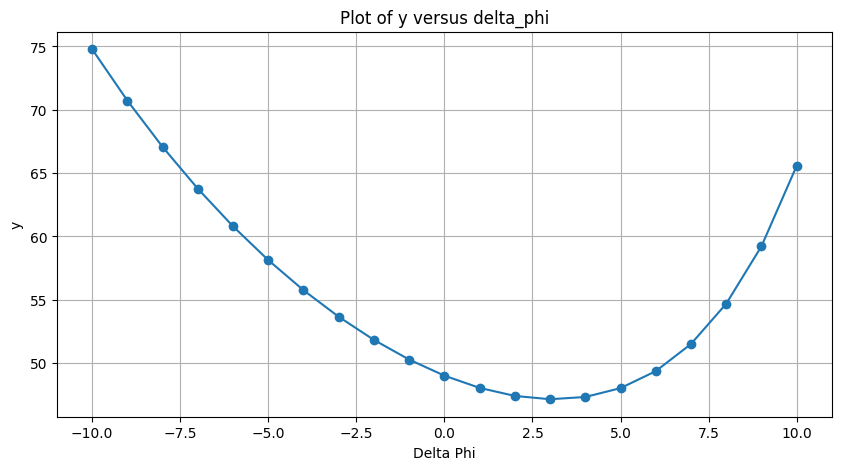

In [363]:
# Provided data
delta_phi = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
y = [74.7809143,70.7280426,67.0695343,63.7692947,60.7980118,58.132576,55.7558861,
     53.656765,51.8302269,50.2780457,49.0095673,48.0432434,47.4084892,47.1487617,
     47.3256149,48.0247345,49.3646584,51.5094719,54.687973,59.222683,65.5755844]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(delta_phi, y, marker='o', linestyle='-')
plt.title('Plot of y versus delta_phi')
plt.xlabel('Delta Phi')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [364]:
with open('/Users/alduck/Documents/Github/mt_industrial_usecase/SpecialIssue_PROFES/MutationAnalisys/Analysis/unmutated_new/MR3_sum_err/Results_MR3Sum_unmutated.json', 'r') as file:
    data = json.load(file)


In [365]:
import numpy as np

data_aux = []
data_df = {}
for key, value in data.items():

    if value['vs'] == 'violated':
        data_df = {
            'test_id': key,
            'delta_phi':value['delta_phi'],
            'sum_err': value['sum_err'],
            'current_min': np.min(value['sum_err']),
            'expected_minimal_error': value['expected_minimal_error'],
            'diff': value['expected_minimal_error']-np.min(value['sum_err']),
            'relative_dif': ((np.min(value['sum_err'])-value['expected_minimal_error'])/value['expected_minimal_error'])*100
        }
        
        data_aux.append(data_df)

In [366]:
df = pd.DataFrame(data_aux)
pd
df.to_csv('aux_errors_violations.csv')

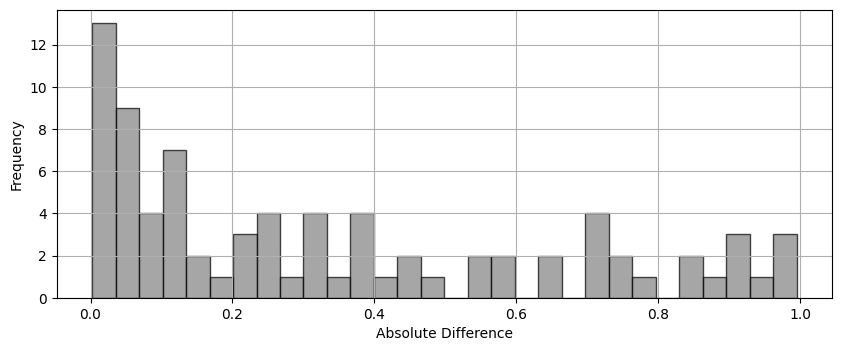

In [390]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# If you have your data in a CSV, you can load it using:
# data = pd.read_csv('path_to_your_file.csv')

# Calculate the absolute value of the 'diff' column
df['diff_abs'] = df['diff'].abs()

# Plot the distribution of the absolute 'diff' values
plt.figure(figsize=(10, 6))
plt.hist(df['diff_abs'], bins=30, alpha=0.7, color='gray', edgecolor='black')
# plt.title('Distribution of Absolute Differences')
plt.xlabel('Absolute Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.subplots_adjust(bottom=0.4)
plt.savefig("histogram.pdf")
plt.show()


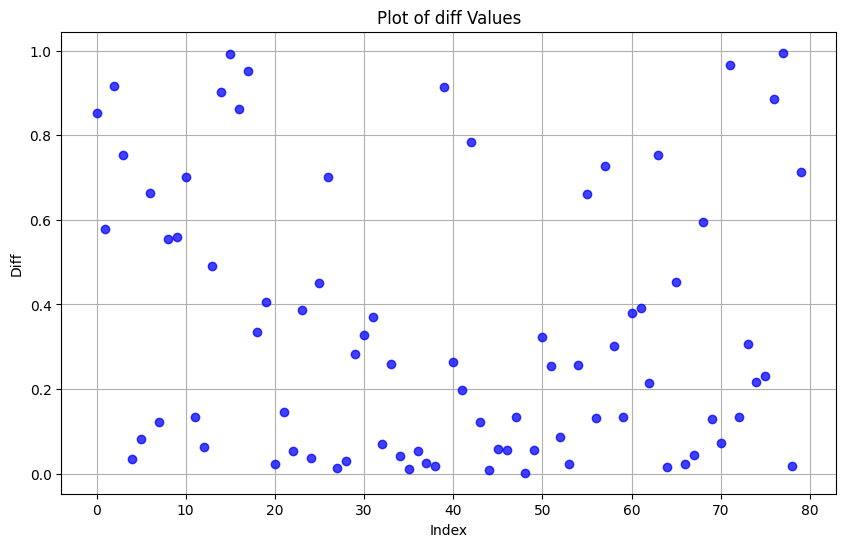

In [368]:
# Plotting the 'diff' values without a histogram, just a regular plot of the values.
plt.figure(figsize=(10, 6))
plt.plot(df['diff'], marker='o', linestyle='', alpha=0.75, color='blue')
plt.title('Plot of diff Values')
plt.xlabel('Index')
plt.ylabel('Diff')
plt.grid(True)

plt.show()


<Figure size 1400x800 with 0 Axes>

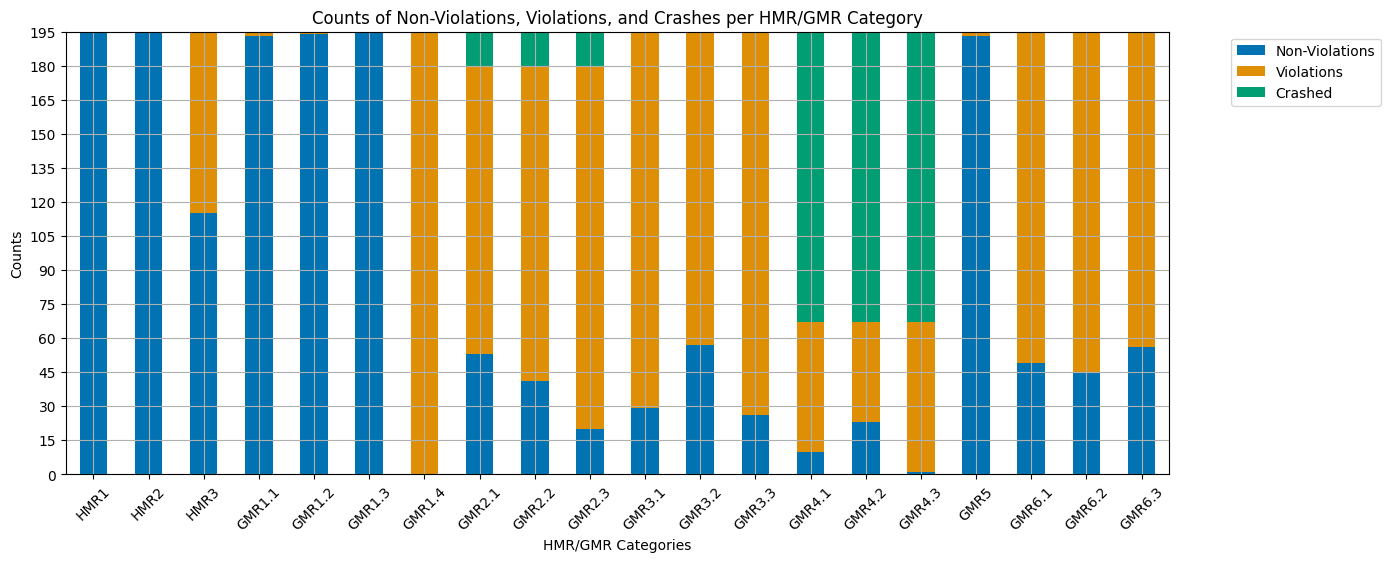

In [391]:
import seaborn as sns

# Update the DataFrame with the new values
palette = sns.color_palette("colorblind")

new_data = {
    'Category': [
        "HMR1", "HMR2", "HMR3",
        "GMR1.1", "GMR1.2", "GMR1.3", "GMR1.4",
        "GMR2.1", "GMR2.2", "GMR2.3",
        "GMR3.1", "GMR3.2", "GMR3.3",
        "GMR4.1", "GMR4.2", "GMR4.3",
        "GMR5",
        "GMR6.1", "GMR6.2", "GMR6.3"
    ],
    'Non-Violations': [
        195, 195, 115,
        193, 194, 195, 0,
        53, 41, 20,
        29, 57, 26,
        10, 23, 1,
        193,
        49, 45, 56
    ],
    'Violations': [
        0, 0, 80,
        2, 1, 0, 195,
        127, 139, 160,
        166, 138, 169,
        57, 44, 66,
        2,
        146, 150, 139
    ],
    'Crashed': [
        0, 0, 0,
        0, 0, 0, 0,
        15, 15, 15,
        0, 0, 0,
        128, 128, 128,
        0,
        0, 0, 0
    ]
}

# Replace the previous DataFrame with new values
df = pd.DataFrame(new_data)

# Recreate the stacked bar plot with the new data
plt.figure(figsize=(14, 8))

# Plotting the bars with corrected data
ax = df.set_index('Category')[['Non-Violations', 'Violations', 'Crashed']].plot(
    kind='bar', 
    stacked=True, 
    color=palette[:3],
    figsize=(14, 8)
)

# Adding labels and title
ax.set_xlabel('HMR/GMR Categories')
ax.set_ylabel('Counts')
ax.set_title('Counts of Non-Violations, Violations, and Crashes per HMR/GMR Category')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis limit
plt.ylim(0, 195)

# Set y-axis ticks including 195
plt.yticks(range(0, 200, 15))

# Place legend outside the plot
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to fit everything
plt.tight_layout()
plt.grid()
plt.subplots_adjust(bottom=0.4)
plt.savefig("unmutated_version.pdf")

# Display the plot
plt.show()


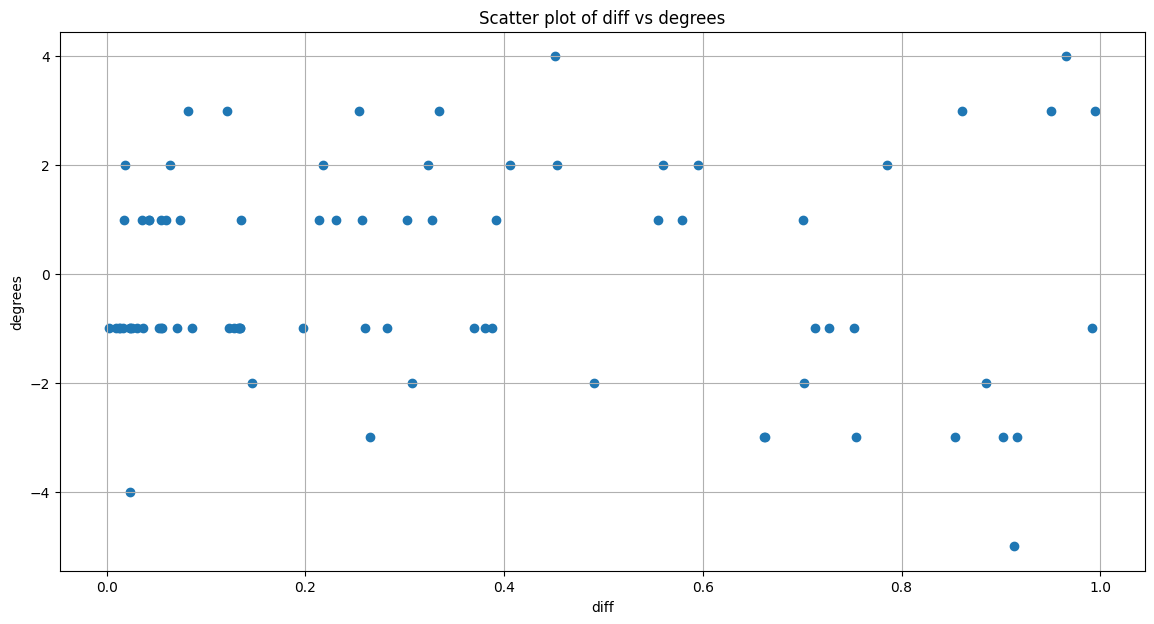

In [370]:
import matplotlib.pyplot as plt
import pandas as pd

# Data provided by the user
data = {
    "diff": [
        0.8533291, 0.5791168, 0.9162579, 0.7539177, 0.03513515, 0.0815277,
        0.6625828, 0.1214273, 0.5549774, 0.5593952, 0.7004372, 0.1349926,
        0.0632019, 0.49085807, 0.902359, 0.991257, 0.8608056, 0.950805,
        0.3344726, 0.4056043, 0.0234013, 0.1457595, 0.0543022, 0.3873234,
        0.0360069, 0.4513626, 0.7016449, 0.0132846, 0.0301466, 0.282486,
        0.3276596, 0.3700447, 0.0702362, 0.2601536, 0.0420608, 0.0120049,
        0.0527983, 0.0258675, 0.0171433, 0.9133606, 0.2648429, 0.1971627,
        0.784874, 0.1227524, 0.0095901, 0.0594711, 0.0550131, 0.1337814,
        0.0022354, 0.0552369, 0.3231811, 0.2539749, 0.0859298, 0.0236456,
        0.25737, 0.66111, 0.1316605, 0.726883, 0.3020401, 0.134232,
        0.3804703, 0.392189, 0.213547, 0.752213, 0.0162887, 0.453431,
        0.0230882, 0.043007, 0.59523, 0.128456, 0.073426, 0.965622,
        0.1333694, 0.30751, 0.217331, 0.230682, 0.884956, 0.99498,
        0.018112, 0.713257
    ],
    "degrees": [
        -3, 1, -3, -3, 1, 3, -3, 3, 1, 2, 1, 1, 2, -2, -3, -1, 3, 3, 3, 2,
        -4, -2, -1, -1, -1, 4, -2, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1,
        1, -5, -3, -1, 2, -1, -1, 1, 1, -1, -1, -1, 2, 3, -1, -1, 1, -3, -1,
        -1, 1, -1, -1, 1, 1, -1, -1, 2, -1, 1, 2, -1, 1, 4, -1, -2, 2, 1, -2,
        3, 2, -1
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14,7))
plt.scatter(df['diff'], df['degrees'])
plt.title('Scatter plot of diff vs degrees')
plt.xlabel('diff')
plt.ylabel('degrees')
plt.grid(True)
plt.show()


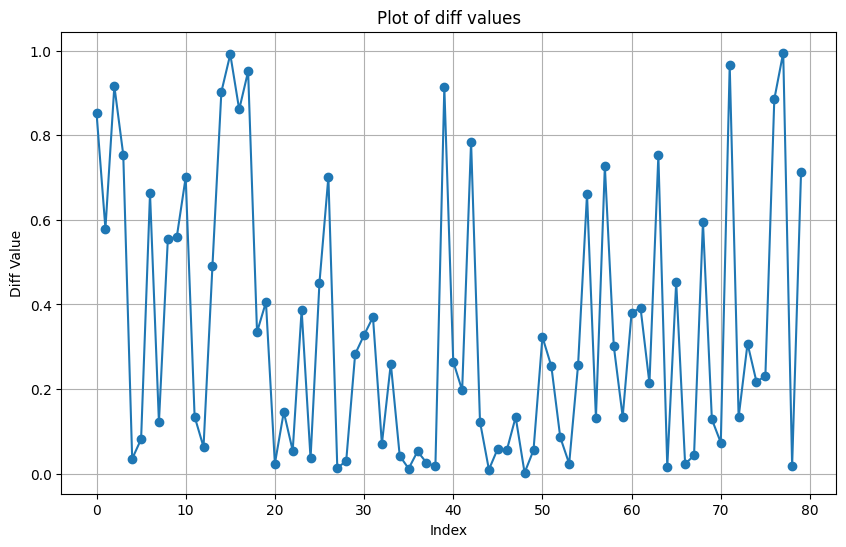

In [371]:
import matplotlib.pyplot as plt

# Given data
diff = [
    0.8533291, 0.5791168, 0.9162579, 0.7539177, 0.03513515, 0.0815277,
    0.6625828, 0.1214273, 0.5549774, 0.5593952, 0.7004372, 0.1349926,
    0.0632019, 0.49085807, 0.902359, 0.991257, 0.8608056, 0.950805,
    0.3344726, 0.4056043, 0.0234013, 0.1457595, 0.0543022, 0.3873234,
    0.0360069, 0.4513626, 0.7016449, 0.0132846, 0.0301466, 0.282486,
    0.3276596, 0.3700447, 0.0702362, 0.2601536, 0.0420608, 0.0120049,
    0.0527983, 0.0258675, 0.0171433, 0.9133606, 0.2648429, 0.1971627,
    0.784874, 0.1227524, 0.0095901, 0.0594711, 0.0550131, 0.1337814,
    0.0022354, 0.0552369, 0.3231811, 0.2539749, 0.0859298, 0.0236456,
    0.25737, 0.66111, 0.1316605, 0.726883, 0.3020401, 0.134232,
    0.3804703, 0.392189, 0.213547, 0.752213, 0.0162887, 0.453431,
    0.0230882, 0.043007, 0.59523, 0.128456, 0.073426, 0.965622,
    0.1333694, 0.30751, 0.217331, 0.230682, 0.884956, 0.99498,
    0.018112, 0.713257
]

# Plotting the 'diff' values
plt.figure(figsize=(10,6))
plt.plot(diff, 'o-') # Using 'o-' to indicate both line and markers
plt.title('Plot of diff values')
plt.xlabel('Index')
plt.ylabel('Diff Value')
plt.grid(True)
plt.show()



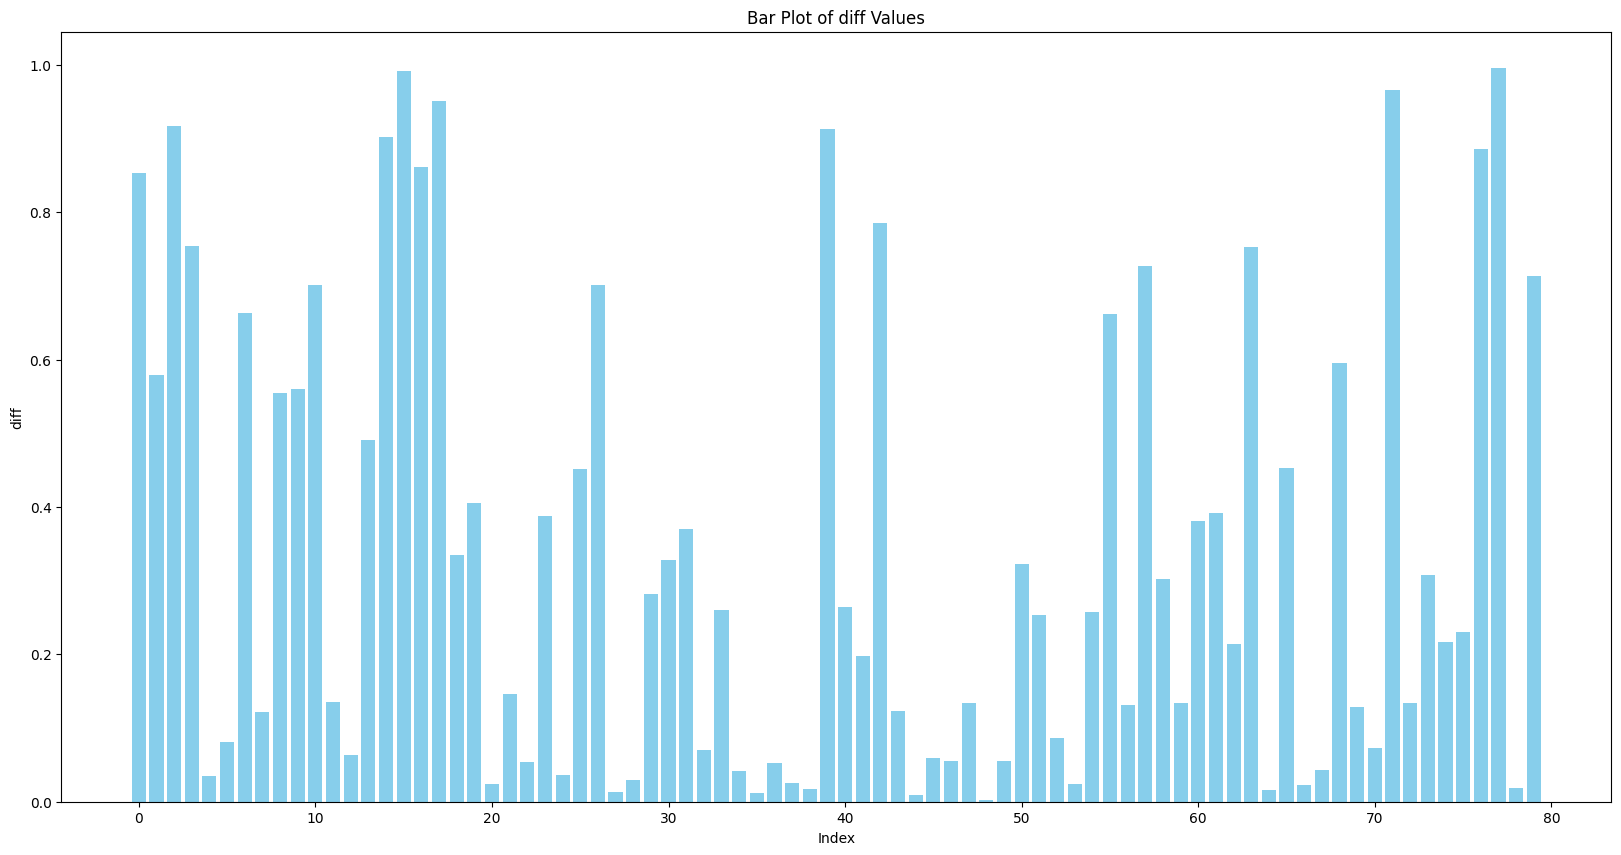

In [372]:
import matplotlib.pyplot as plt

# Data provided by the user
diff_values = [
    0.8533291, 0.5791168, 0.9162579, 0.7539177, 0.03513515, 0.0815277,
    0.6625828, 0.1214273, 0.5549774, 0.5593952, 0.7004372, 0.1349926,
    0.0632019, 0.49085807, 0.902359, 0.991257, 0.8608056, 0.950805,
    0.3344726, 0.4056043, 0.0234013, 0.1457595, 0.0543022, 0.3873234,
    0.0360069, 0.4513626, 0.7016449, 0.0132846, 0.0301466, 0.282486,
    0.3276596, 0.3700447, 0.0702362, 0.2601536, 0.0420608, 0.0120049,
    0.0527983, 0.0258675, 0.0171433, 0.9133606, 0.2648429, 0.1971627,
    0.784874, 0.1227524, 0.0095901, 0.0594711, 0.0550131, 0.1337814,
    0.0022354, 0.0552369, 0.3231811, 0.2539749, 0.0859298, 0.0236456,
    0.25737, 0.66111, 0.1316605, 0.726883, 0.3020401, 0.134232,
    0.3804703, 0.392189, 0.213547, 0.752213, 0.0162887, 0.453431,
    0.0230882, 0.043007, 0.59523, 0.128456, 0.073426, 0.965622,
    0.1333694, 0.30751, 0.217331, 0.230682, 0.884956, 0.99498,
    0.018112, 0.713257
]

# Create a bar plot
plt.figure(figsize=(20, 10))
plt.bar(range(len(diff_values)), diff_values, color='skyblue')
plt.title('Bar Plot of diff Values')
plt.xlabel('Index')
plt.ylabel('diff')
plt.show()


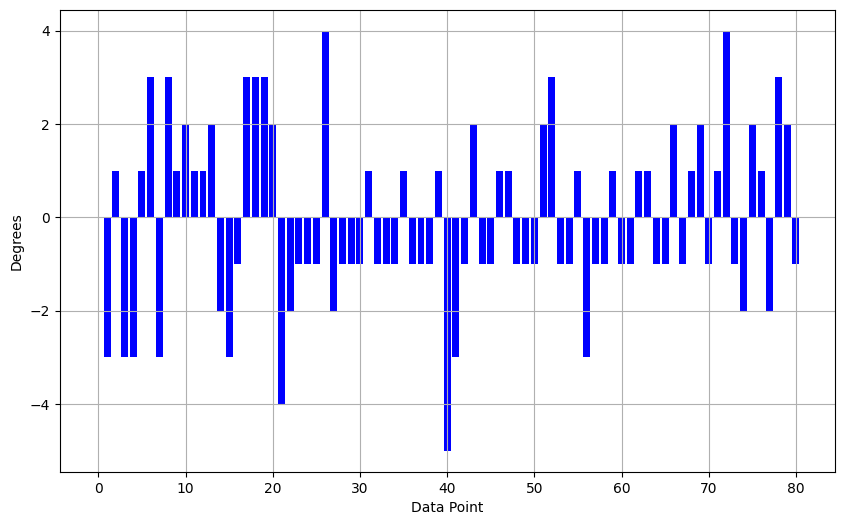

In [373]:
import matplotlib.pyplot as plt

# The provided degrees for plotting
degrees = [
    0, -3, 1, -3, -3, 1, 3, -3, 3, 1, 2, 1, 1, 2, -2, -3, -1, 3, 3, 3, 2, -4, -2, -1, -1, -1, 4, -2, -1, -1, -1, 1, -1, -1,
    -1, 1, -1, -1, -1, 1, -5, -3, -1, 2, -1, -1, 1, 1, -1, -1, -1, 2, 3, -1, -1, 1, -3, -1, -1, 1, -1, -1, 1, 1, -1, -1, 2,
    -1, 1, 2, -1, 1, 4, -1, -2, 2, 1, -2, 3, 2, -1
]

# We need to have x-values to correspond to the degrees, simple range with the length of degrees list will suffice
x_values = list(range(len(degrees)))

# Now we plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_values, degrees, color='blue')

# Adding titles and labels
# plt.title('Bar Plot of Degrees')
plt.xlabel('Data Point')
plt.ylabel('Degrees')
plt.grid(True)
plt.savefig("angle_distribution.pdf")
# Display the plot
plt.show()


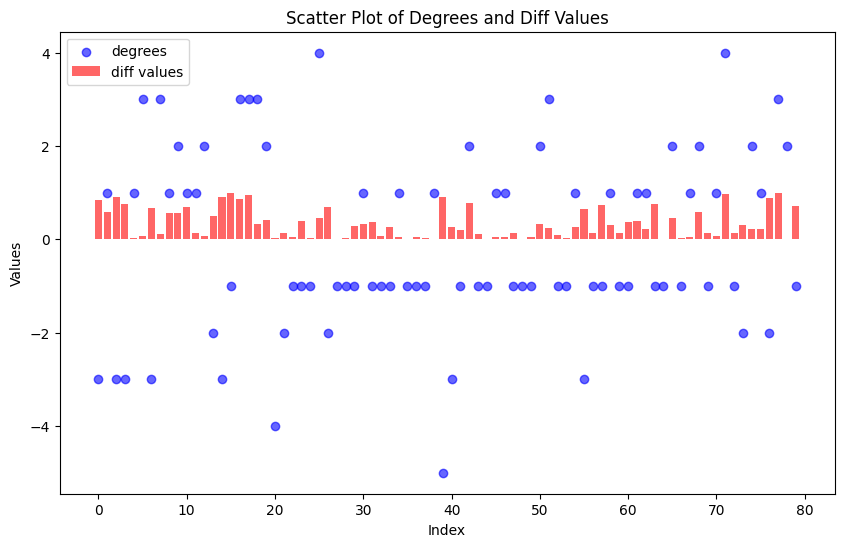

In [374]:
import matplotlib.pyplot as plt

# Provided data for the degrees and differences
degrees = [
    -3, 1, -3, -3, 1, 3, -3, 3, 1, 2, 1, 1, 2, -2, -3, -1, 3, 3, 3, 2, -4, -2, -1,
    -1, -1, 4, -2, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -5, -3, -1, 2, -1,
    -1, 1, 1, -1, -1, -1, 2, 3, -1, -1, 1, -3, -1, -1, 1, -1, -1, 1, 1, -1, -1, 2,
    -1, 1, 2, -1, 1, 4, -1, -2, 2, 1, -2, 3, 2, -1
]

diff_values = [
    0.8533291, 0.5791168, 0.9162579, 0.7539177, 0.03513515, 0.0815277,
    0.6625828, 0.1214273, 0.5549774, 0.5593952, 0.7004372, 0.1349926,
    0.0632019, 0.49085807, 0.902359, 0.991257, 0.8608056, 0.950805,
    0.3344726, 0.4056043, 0.0234013, 0.1457595, 0.0543022, 0.3873234,
    0.0360069, 0.4513626, 0.7016449, 0.0132846, 0.0301466, 0.282486,
    0.3276596, 0.3700447, 0.0702362, 0.2601536, 0.0420608, 0.0120049,
    0.0527983, 0.0258675, 0.0171433, 0.9133606, 0.2648429, 0.1971627,
    0.784874, 0.1227524, 0.0095901, 0.0594711, 0.0550131, 0.1337814,
    0.0022354, 0.0552369, 0.3231811, 0.2539749, 0.0859298, 0.0236456,
    0.25737, 0.66111, 0.1316605, 0.726883, 0.3020401, 0.134232,
    0.3804703, 0.392189, 0.213547, 0.752213, 0.0162887, 0.453431,
    0.0230882, 0.043007, 0.59523, 0.128456, 0.073426, 0.965622,
    0.1333694, 0.30751, 0.217331, 0.230682, 0.884956, 0.99498,
    0.018112, 0.713257
]

# Plot size
plt.figure(figsize=(10, 6))

# Create the first scatter plot for degrees
plt.scatter(range(len(degrees)), degrees, color='blue', alpha=0.6, label='degrees')

# Add the second scatter plot for diff_values
plt.bar(range(len(diff_values)), diff_values, color='red', alpha=0.6, label='diff values')

# Title and labels
plt.title('Scatter Plot of Degrees and Diff Values')
plt.xlabel('Index')
plt.ylabel('Values')

# Legend
plt.legend()

# Display the plot
plt.show()




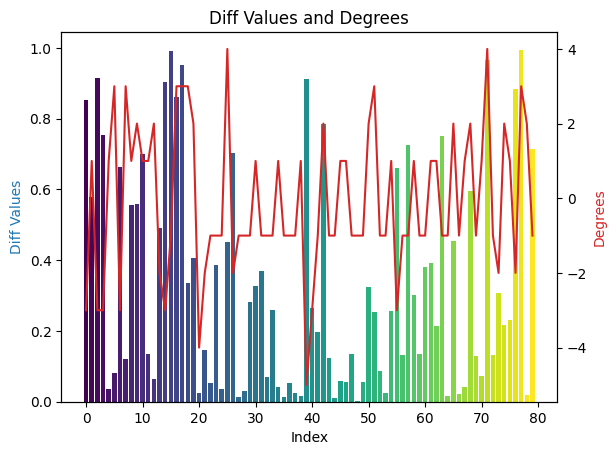

In [375]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
diff_values = [
    0.8533291, 0.5791168, 0.9162579, 0.7539177, 0.03513515, 0.0815277,
    0.6625828, 0.1214273, 0.5549774, 0.5593952, 0.7004372, 0.1349926,
    0.0632019, 0.49085807, 0.902359, 0.991257, 0.8608056, 0.950805,
    0.3344726, 0.4056043, 0.0234013, 0.1457595, 0.0543022, 0.3873234,
    0.0360069, 0.4513626, 0.7016449, 0.0132846, 0.0301466, 0.282486,
    0.3276596, 0.3700447, 0.0702362, 0.2601536, 0.0420608, 0.0120049,
    0.0527983, 0.0258675, 0.0171433, 0.9133606, 0.2648429, 0.1971627,
    0.784874, 0.1227524, 0.0095901, 0.0594711, 0.0550131, 0.1337814,
    0.0022354, 0.0552369, 0.3231811, 0.2539749, 0.0859298, 0.0236456,
    0.25737, 0.66111, 0.1316605, 0.726883, 0.3020401, 0.134232,
    0.3804703, 0.392189, 0.213547, 0.752213, 0.0162887, 0.453431,
    0.0230882, 0.043007, 0.59523, 0.128456, 0.073426, 0.965622,
    0.1333694, 0.30751, 0.217331, 0.230682, 0.884956, 0.99498,
    0.018112, 0.713257
]

degrees = [
    -3, 1, -3, -3, 1, 3, -3, 3, 1, 2, 1, 1, 2, -2, -3, -1, 3, 3, 3, 2, -4, -2, -1,
    -1, -1, 4, -2, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -5, -3, -1, 2, -1,
    -1, 1, 1, -1, -1, -1, 2, 3, -1, -1, 1, -3, -1, -1, 1, -1, -1, 1, 1, -1, -1, 2,
    -1, 1, 2, -1, 1, 4, -1, -2, 2, 1, -2, 3, 2, -1
]

indices = np.arange(len(diff_values))

fig, ax1 = plt.subplots()

# Plot diff_values as bars with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(diff_values)))
ax1.bar(indices, diff_values, color=colors)

# Secondary y-axis for degrees
ax2 = ax1.twinx()
ax2.plot(indices, degrees, color='tab:red', label='Degrees')

# Adjust plot settings
ax1.set_xlabel('Index')
ax1.set_ylabel('Diff Values', color='tab:blue')
ax2.set_ylabel('Degrees', color='tab:red')
plt.title('Diff Values and Degrees')

plt.show()



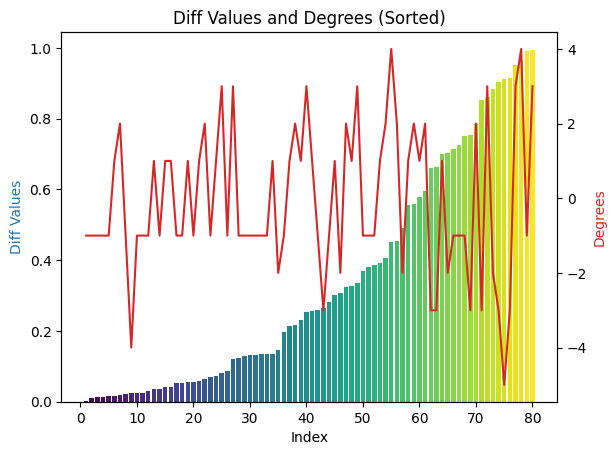

In [376]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
diff_values = [
    0.8533291, 0.5791168, 0.9162579, 0.7539177, 0.03513515, 0.0815277,
    0.6625828, 0.1214273, 0.5549774, 0.5593952, 0.7004372, 0.1349926,
    0.0632019, 0.49085807, 0.902359, 0.991257, 0.8608056, 0.950805,
    0.3344726, 0.4056043, 0.0234013, 0.1457595, 0.0543022, 0.3873234,
    0.0360069, 0.4513626, 0.7016449, 0.0132846, 0.0301466, 0.282486,
    0.3276596, 0.3700447, 0.0702362, 0.2601536, 0.0420608, 0.0120049,
    0.0527983, 0.0258675, 0.0171433, 0.9133606, 0.2648429, 0.1971627,
    0.784874, 0.1227524, 0.0095901, 0.0594711, 0.0550131, 0.1337814,
    0.0022354, 0.0552369, 0.3231811, 0.2539749, 0.0859298, 0.0236456,
    0.25737, 0.66111, 0.1316605, 0.726883, 0.3020401, 0.134232,
    0.3804703, 0.392189, 0.213547, 0.752213, 0.0162887, 0.453431,
    0.0230882, 0.043007, 0.59523, 0.128456, 0.073426, 0.965622,
    0.1333694, 0.30751, 0.217331, 0.230682, 0.884956, 0.99498,
    0.018112, 0.713257
]

degrees = [
    -3, 1, -3, -3, 1, 3, -3, 3, 1, 2, 1, 1, 2, -2, -3, -1, 3, 3, 3, 2, -4, -2, -1,
    -1, -1, 4, -2, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -5, -3, -1, 2, -1,
    -1, 1, 1, -1, -1, -1, 2, 3, -1, -1, 1, -3, -1, -1, 1, -1, -1, 1, 1, -1, -1, 2,
    -1, 1, 2, -1, 1, 4, -1, -2, 2, 1, -2, 3, 2, -1
]

# Sort the indices based on diff_values
sorted_indices = np.argsort(diff_values)
sorted_diff_values = [diff_values[i] for i in sorted_indices]
sorted_degrees = [degrees[i] for i in sorted_indices]

indices = np.arange(1, len(diff_values) + 1)  # Adjusting indices to start from 1

fig, ax1 = plt.subplots()

# Plot sorted diff_values as bars with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(diff_values)))
ax1.bar(indices, sorted_diff_values, color=colors)

# Secondary y-axis for sorted degrees
ax2 = ax1.twinx()
ax2.plot(indices, sorted_degrees, color='tab:red', label='Degrees')

# Adjust plot settings
ax1.set_xlabel('Index')
ax1.set_ylabel('Diff Values', color='tab:blue')
ax2.set_ylabel('Degrees', color='tab:red')
plt.title('Diff Values and Degrees (Sorted)')

plt.show()



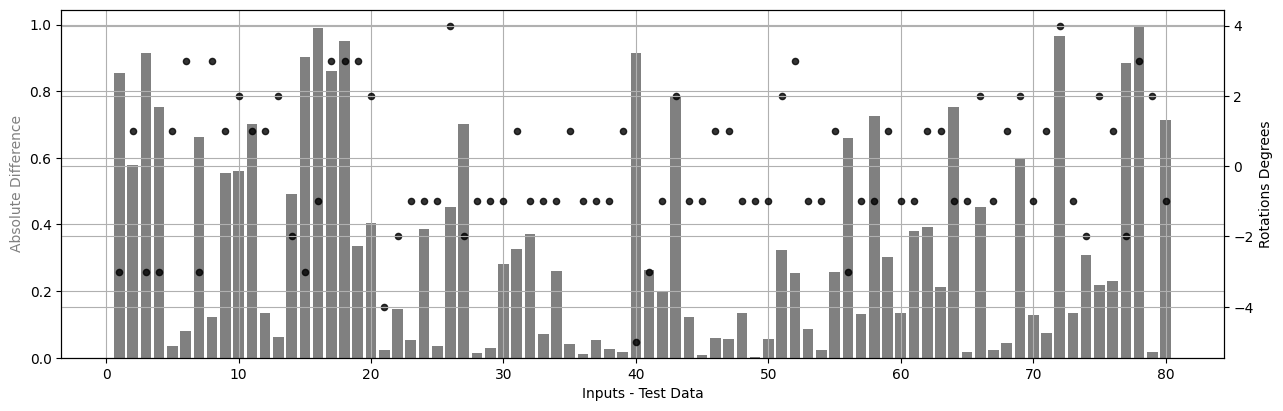

In [377]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
diff_values = [
    0.8533291, 0.5791168, 0.9162579, 0.7539177, 0.03513515, 0.0815277,
    0.6625828, 0.1214273, 0.5549774, 0.5593952, 0.7004372, 0.1349926,
    0.0632019, 0.49085807, 0.902359, 0.991257, 0.8608056, 0.950805,
    0.3344726, 0.4056043, 0.0234013, 0.1457595, 0.0543022, 0.3873234,
    0.0360069, 0.4513626, 0.7016449, 0.0132846, 0.0301466, 0.282486,
    0.3276596, 0.3700447, 0.0702362, 0.2601536, 0.0420608, 0.0120049,
    0.0527983, 0.0258675, 0.0171433, 0.9133606, 0.2648429, 0.1971627,
    0.784874, 0.1227524, 0.0095901, 0.0594711, 0.0550131, 0.1337814,
    0.0022354, 0.0552369, 0.3231811, 0.2539749, 0.0859298, 0.0236456,
    0.25737, 0.66111, 0.1316605, 0.726883, 0.3020401, 0.134232,
    0.3804703, 0.392189, 0.213547, 0.752213, 0.0162887, 0.453431,
    0.0230882, 0.043007, 0.59523, 0.128456, 0.073426, 0.965622,
    0.1333694, 0.30751, 0.217331, 0.230682, 0.884956, 0.99498,
    0.018112, 0.713257
]

degrees = [
    -3, 1, -3, -3, 1, 3, -3, 3, 1, 2, 1, 1, 2, -2, -3, -1, 3, 3, 3, 2, -4, -2, -1,
    -1, -1, 4, -2, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -5, -3, -1, 2, -1,
    -1, 1, 1, -1, -1, -1, 2, 3, -1, -1, 1, -3, -1, -1, 1, -1, -1, 1, 1, -1, -1, 2,
    -1, 1, 2, -1, 1, 4, -1, -2, 2, 1, -2, 3, 2, -1
]

indices = np.arange(len(diff_values)) + 1  # Start index from 1

fig, ax1 = plt.subplots(figsize=(15, 6))  # Adjust figure size here

# Bar plot for absolute diff values on the left y-axis
ax1.bar(indices, diff_values, color='grey', alpha=1, label='Absolute difference', width=0.8)
ax1.set_ylabel('Absolute Difference', color='grey')
plt.grid()

# Scatter plot for degrees on the right y-axis with reduced dot size
ax2 = ax1.twinx()
ax2.scatter(indices, degrees, color='black', label='Rotations Degrees', s=20, alpha=0.8)  # Set the size using the s parameter
ax2.set_ylabel('Rotations Degrees', color='black')
# Adjust plot settings
plt.grid()

ax1.set_xlabel('Inputs - Test Data')
# plt.title('Degrees and Diff Values')

# Increase spacing between bars and size of the x-axis
plt.subplots_adjust(bottom=0.3)
plt.savefig("absolute_difference.pdf")

plt.show()


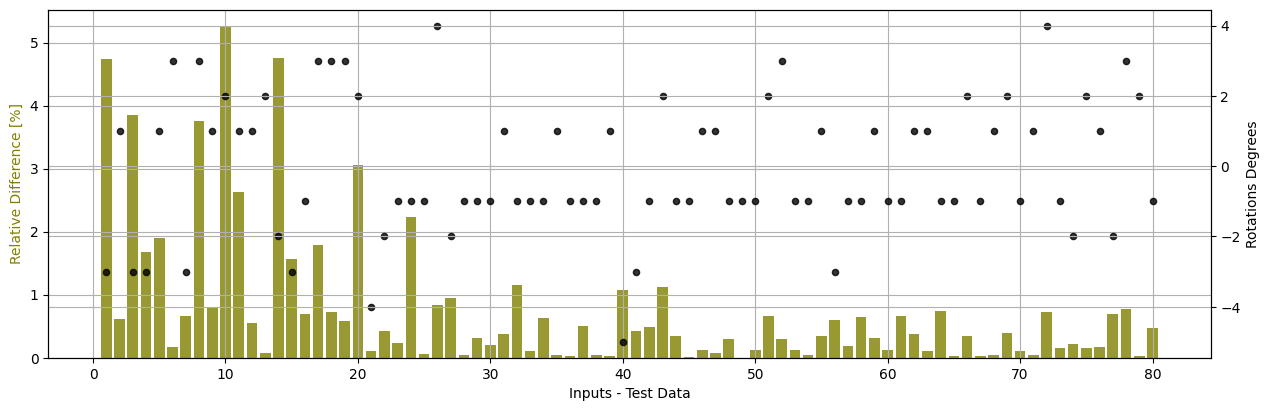

In [378]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
relative_difference = [
    4.74, 0.61, 3.85, 1.67, 1.90, 0.17, 0.66, 3.76, 0.79, 5.26,
    2.63, 0.55, 0.08, 4.75, 1.57, 0.70, 1.79, 0.73, 0.58, 3.06,
    0.10, 0.43, 0.24, 2.24, 0.06, 0.83, 0.94, 0.05, 0.32, 0.20,
    0.38, 1.15, 0.10, 0.63, 0.05, 0.03, 0.51, 0.04, 0.02, 1.08,
    0.43, 0.49, 1.13, 0.35, 0.01, 0.13, 0.07, 0.29, 0.00, 0.12,
    0.67, 0.29, 0.12, 0.04, 0.34, 0.60, 0.19, 0.65, 0.32, 0.12,
    0.66, 0.37, 0.10, 0.74, 0.02, 0.34, 0.03, 0.04, 0.40, 0.11,
    0.04, 0.73, 0.16, 0.22, 0.15, 0.17, 0.69, 0.77, 0.02, 0.47
]

degrees = [
    -3, 1, -3, -3, 1, 3, -3, 3, 1, 2, 1, 1, 2, -2, -3, -1, 3, 3, 3, 2, -4, -2, -1,
    -1, -1, 4, -2, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -5, -3, -1, 2, -1,
    -1, 1, 1, -1, -1, -1, 2, 3, -1, -1, 1, -3, -1, -1, 1, -1, -1, 1, 1, -1, -1, 2,
    -1, 1, 2, -1, 1, 4, -1, -2, 2, 1, -2, 3, 2, -1
]

indices = np.arange(len(relative_difference)) + 1  # Start index from 1

fig, ax1 = plt.subplots(figsize=(15, 6))  # Adjust figure size here

# Bar plot for relative difference values on the left y-axis
ax1.bar(indices, relative_difference, color='olive', alpha=0.8, label='Relative Difference', width=0.8)
ax1.set_ylabel('Relative Difference [%]', color = 'olive')
plt.grid()
# Scatter plot for degrees on the right y-axis with reduced dot size
ax2 = ax1.twinx()
ax2.scatter(indices, degrees, color='black', label='Rotations Degrees', s=20, alpha=0.8)  # Set the size using the s parameter
ax2.set_ylabel('Rotations Degrees')
plt.grid()

# Adjust plot settings
ax1.set_xlabel('Inputs - Test Data')
# plt.title('Relative Difference and Degrees')

# Increase spacing between bars and size of the x-axis
plt.subplots_adjust(bottom=0.3)
plt.savefig("relative_difference.pdf")
plt.show()


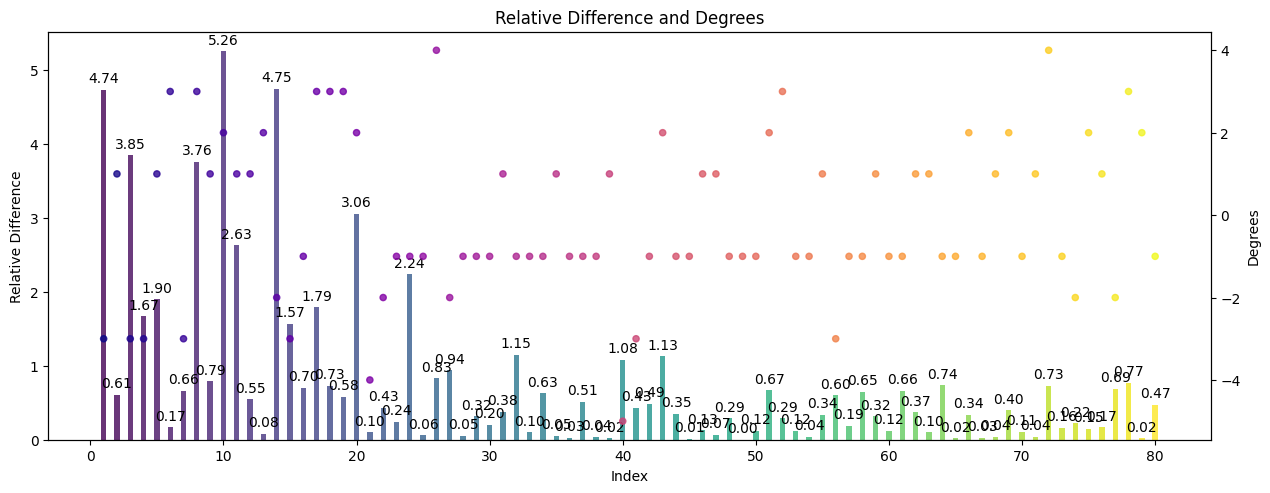

In [379]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
relative_difference = [
    4.74, 0.61, 3.85, 1.67, 1.90, 0.17, 0.66, 3.76, 0.79, 5.26,
    2.63, 0.55, 0.08, 4.75, 1.57, 0.70, 1.79, 0.73, 0.58, 3.06,
    0.10, 0.43, 0.24, 2.24, 0.06, 0.83, 0.94, 0.05, 0.32, 0.20,
    0.38, 1.15, 0.10, 0.63, 0.05, 0.03, 0.51, 0.04, 0.02, 1.08,
    0.43, 0.49, 1.13, 0.35, 0.01, 0.13, 0.07, 0.29, 0.00, 0.12,
    0.67, 0.29, 0.12, 0.04, 0.34, 0.60, 0.19, 0.65, 0.32, 0.12,
    0.66, 0.37, 0.10, 0.74, 0.02, 0.34, 0.03, 0.04, 0.40, 0.11,
    0.04, 0.73, 0.16, 0.22, 0.15, 0.17, 0.69, 0.77, 0.02, 0.47
]

degrees = [
    -3, 1, -3, -3, 1, 3, -3, 3, 1, 2, 1, 1, 2, -2, -3, -1, 3, 3, 3, 2, -4, -2, -1,
    -1, -1, 4, -2, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -5, -3, -1, 2, -1,
    -1, 1, 1, -1, -1, -1, 2, 3, -1, -1, 1, -3, -1, -1, 1, -1, -1, 1, 1, -1, -1, 2,
    -1, 1, 2, -1, 1, 4, -1, -2, 2, 1, -2, 3, 2, -1
]

indices = np.arange(len(relative_difference)) + 1  # Start index from 1

fig, ax1 = plt.subplots(figsize=(15, 6))  # Adjust figure size here

# Bar plot for relative difference values on the left y-axis
bars = ax1.bar(indices, relative_difference, color=plt.cm.viridis(np.linspace(0, 1, len(relative_difference))), alpha=0.8, label='Relative Difference', width=0.4)
ax1.set_ylabel('Relative Difference')

# Annotate each bar with its respective value
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Scatter plot for degrees on the right y-axis with reduced dot size
ax2 = ax1.twinx()
ax2.scatter(indices, degrees, color=plt.cm.plasma(np.linspace(0, 1, len(relative_difference))), label='Degrees', s=20, alpha=0.8)  # Set the size using the s parameter
ax2.set_ylabel('Degrees')

# Adjust plot settings
ax1.set_xlabel('Index')
plt.title('Relative Difference and Degrees')

# Increase spacing between bars and size of the x-axis
plt.subplots_adjust(bottom=0.2)

plt.show()


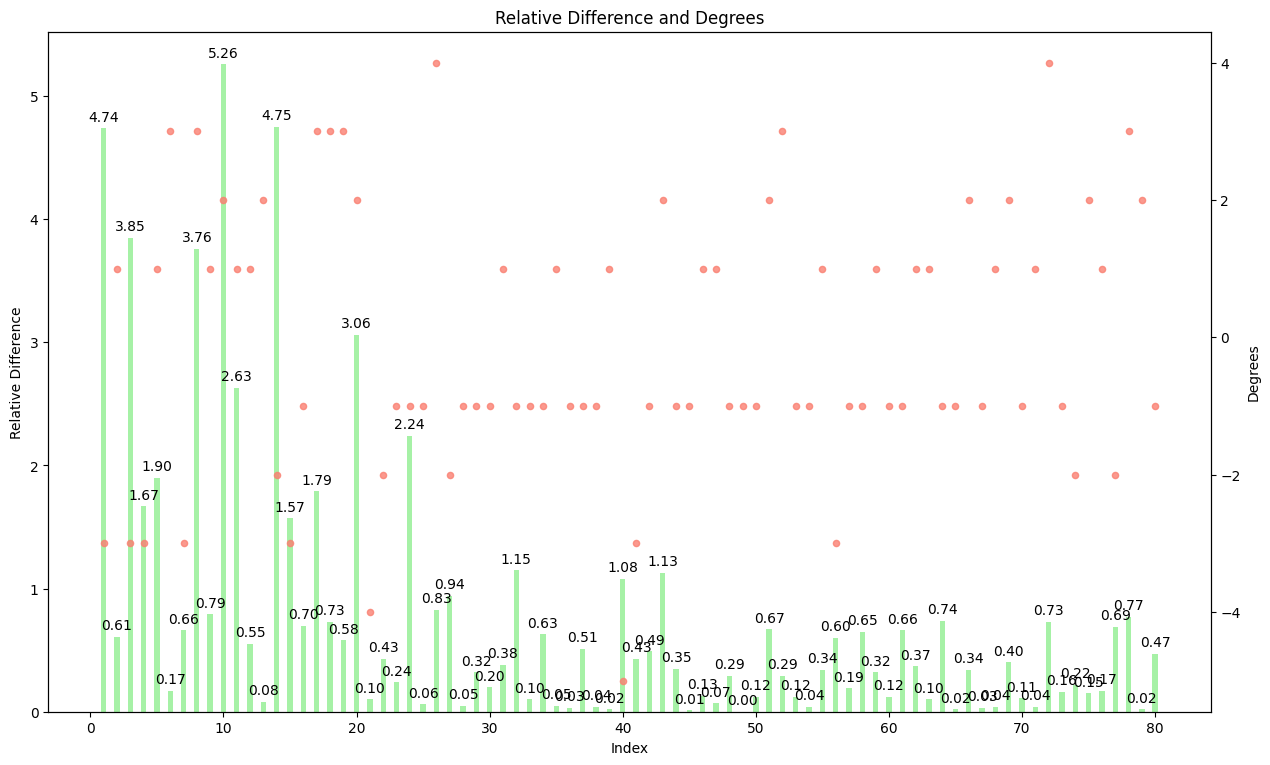

In [380]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
relative_difference = [
    4.74, 0.61, 3.85, 1.67, 1.90, 0.17, 0.66, 3.76, 0.79, 5.26,
    2.63, 0.55, 0.08, 4.75, 1.57, 0.70, 1.79, 0.73, 0.58, 3.06,
    0.10, 0.43, 0.24, 2.24, 0.06, 0.83, 0.94, 0.05, 0.32, 0.20,
    0.38, 1.15, 0.10, 0.63, 0.05, 0.03, 0.51, 0.04, 0.02, 1.08,
    0.43, 0.49, 1.13, 0.35, 0.01, 0.13, 0.07, 0.29, 0.00, 0.12,
    0.67, 0.29, 0.12, 0.04, 0.34, 0.60, 0.19, 0.65, 0.32, 0.12,
    0.66, 0.37, 0.10, 0.74, 0.02, 0.34, 0.03, 0.04, 0.40, 0.11,
    0.04, 0.73, 0.16, 0.22, 0.15, 0.17, 0.69, 0.77, 0.02, 0.47
]

degrees = [
    -3, 1, -3, -3, 1, 3, -3, 3, 1, 2, 1, 1, 2, -2, -3, -1, 3, 3, 3, 2, -4, -2, -1,
    -1, -1, 4, -2, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -5, -3, -1, 2, -1,
    -1, 1, 1, -1, -1, -1, 2, 3, -1, -1, 1, -3, -1, -1, 1, -1, -1, 1, 1, -1, -1, 2,
    -1, 1, 2, -1, 1, 4, -1, -2, 2, 1, -2, 3, 2, -1
]

indices = np.arange(len(relative_difference)) + 1  # Start index from 1

fig, ax1 = plt.subplots(figsize=(15, 10))  # Adjust figure size here

# Bar plot for relative difference values on the left y-axis
bars = ax1.bar(indices, relative_difference, color='lightgreen', alpha=0.8, label='Relative Difference', width=0.4)
ax1.set_ylabel('Relative Difference')

# Annotate each bar with its respective value
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Scatter plot for degrees on the right y-axis with reduced dot size
ax2 = ax1.twinx()
ax2.scatter(indices, degrees, color='salmon', label='Degrees', s=20, alpha=0.8)  # Set the size using the s parameter
ax2.set_ylabel('Degrees')

# Adjust plot settings
ax1.set_xlabel('Index')
plt.title('Relative Difference and Degrees')

# Increase spacing between bars and size of the x-axis
plt.subplots_adjust(bottom=0.2)

plt.show()


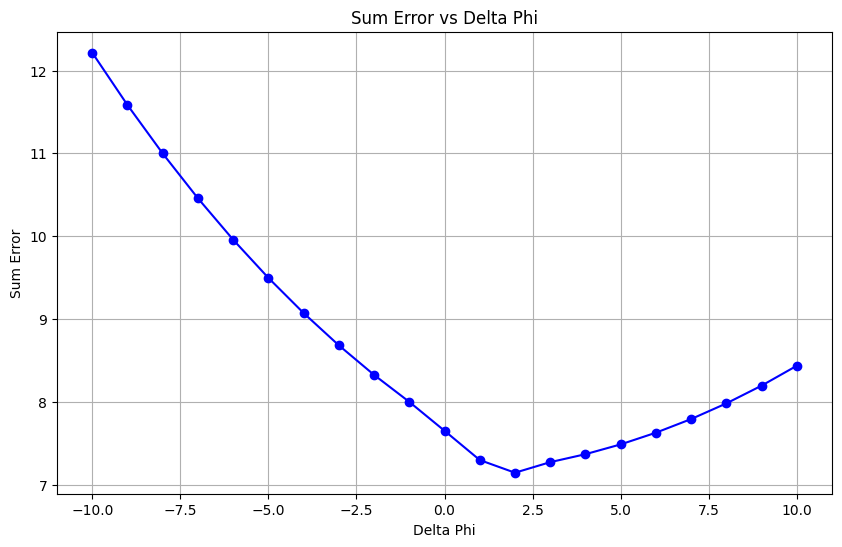

In [381]:
import matplotlib.pyplot as plt

sum_err = [12.2155399, 11.5836983, 10.9986668, 10.4575081, 9.9575558, 9.4964008, 9.0718632, 8.68196487, 8.32491493, 7.9990921, 7.650303, 7.29680166, 7.1436348, 7.27122355, 7.36735725, 7.48572826, 7.62694645, 7.7916975, 7.98075962, 8.19500351, 8.4354]
delta_phi = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plt.figure(figsize=(10, 6))
plt.plot(delta_phi, sum_err, marker='o', color='blue', linestyle='-')
plt.title('Sum Error vs Delta Phi')
plt.xlabel('Delta Phi')
plt.ylabel('Sum Error')
plt.grid(True)
plt.show()


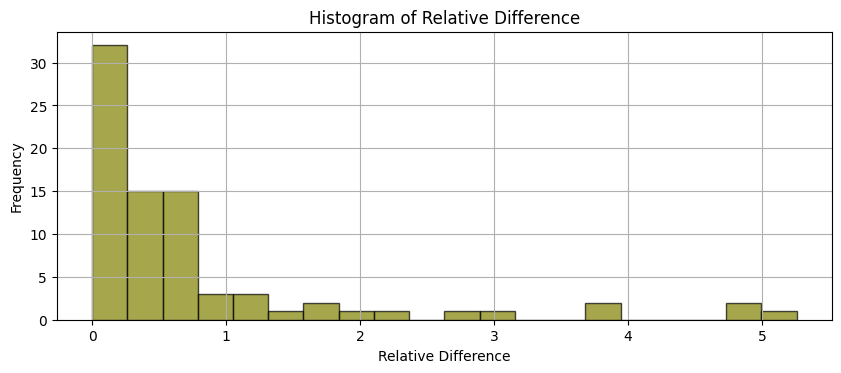

In [389]:
import matplotlib.pyplot as plt

# Data for plotting
relative_difference = [
    4.74, 0.61, 3.85, 1.67, 1.90, 0.17, 0.66, 3.76, 0.79, 5.26,
    2.63, 0.55, 0.08, 4.75, 1.57, 0.70, 1.79, 0.73, 0.58, 3.06,
    0.10, 0.43, 0.24, 2.24, 0.06, 0.83, 0.94, 0.05, 0.32, 0.20,
    0.38, 1.15, 0.10, 0.63, 0.05, 0.03, 0.51, 0.04, 0.02, 1.08,
    0.43, 0.49, 1.13, 0.35, 0.01, 0.13, 0.07, 0.29, 0.00, 0.12,
    0.67, 0.29, 0.12, 0.04, 0.34, 0.60, 0.19, 0.65, 0.32, 0.12,
    0.66, 0.37, 0.10, 0.74, 0.02, 0.34, 0.03, 0.04, 0.40, 0.11,
    0.04, 0.73, 0.16, 0.22, 0.15, 0.17, 0.69, 0.77, 0.02, 0.47
]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(relative_difference, bins=20, color='olive', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Relative Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Relative Difference')
plt.subplots_adjust(bottom=0.4)
# Show plot
plt.grid(True)
plt.savefig("Histogram_relative_difference.pdf")
plt.show()
